In [1]:
import warnings as _wrn
_wrn.filterwarnings('always')

In [2]:
import sys as _sys
import itertools as _itr

import numpy as _nmp
import numpy.random as _rnd
import matplotlib.pyplot as _plt
import pandas as _pnd

%load_ext autoreload
%autoreload 2
%matplotlib inline

_plt.style.use('ggplot')

In [3]:
import eQTLseq as _assoc

In [4]:
cd ~/WTCHG/Cluster/Projects/eQTLseq/

/Users/dimitris/WTCHG/Cluster/Projects/eQTLseq


In [5]:
# ... load real data

data = {
    'G': _pnd.read_table('data/geuvadis/genotypes.TF.common.HIGH.txt', index_col=0, header=None),
    'Z': _pnd.read_table('data/geuvadis/counts_miRNAs.txt', index_col=0)
}

samples = data['G'].index & data['Z'].columns

data['Z'] = data['Z'][samples].values
data['G'] = data['G'].loc[samples].values

(452, 21) (2226, 452)


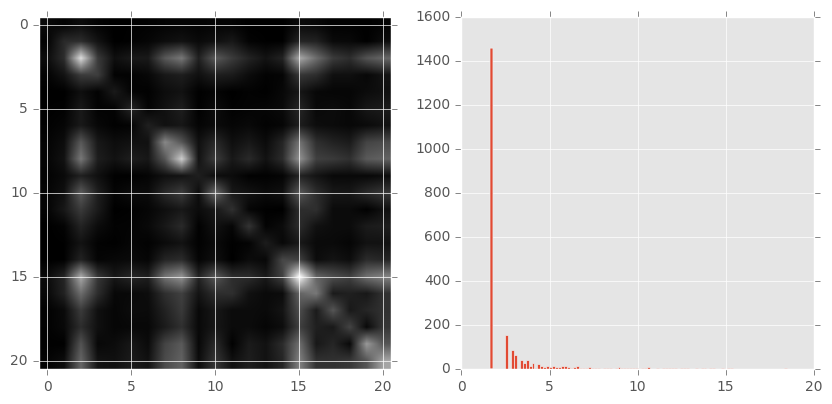

In [54]:
# prepare data

Z = data['Z']
G = data['G']

Z = Z[Z.sum(1) > 0, :]       # keep only expressed tags
# Z = Z[Z.sum(1) > _nmp.percentile(Z.sum(1), 90), :]
G = G[:, _nmp.std(G, 0) > 0] # keep only non-monomorphic loci

# Z = Z / _assoc.calculate_norm_factors(Z)
Z = _assoc.transform_data(Z, kind='vst')

print(G.shape, Z.shape)

# take a quick look at the data

_plt.figure(figsize=(10,10));
_plt.subplot(2,2,1); _plt.imshow(G.T.dot(G), cmap=_plt.cm.Greys_r);
_plt.subplot(2,2,2); _plt.hist(Z[:, 0], bins=100);

In [55]:
_rnd.seed(0)
res = _assoc.run(Z.T, G, n_iters = 4000, model='Normal', n_threads=4)

/Users/dimitris/VEnvs/py35/lib/python3.5/site-packages/tqdm/_tqdm.py:65: DeprecationWarning: sys.getcheckinterval() and sys.setcheckinterval() are deprecated.  Use sys.setswitchinterval() instead.
  sys.setcheckinterval(100)
100%|██████████| 4000/4000 [02:00<00:00, 33.29it/s]


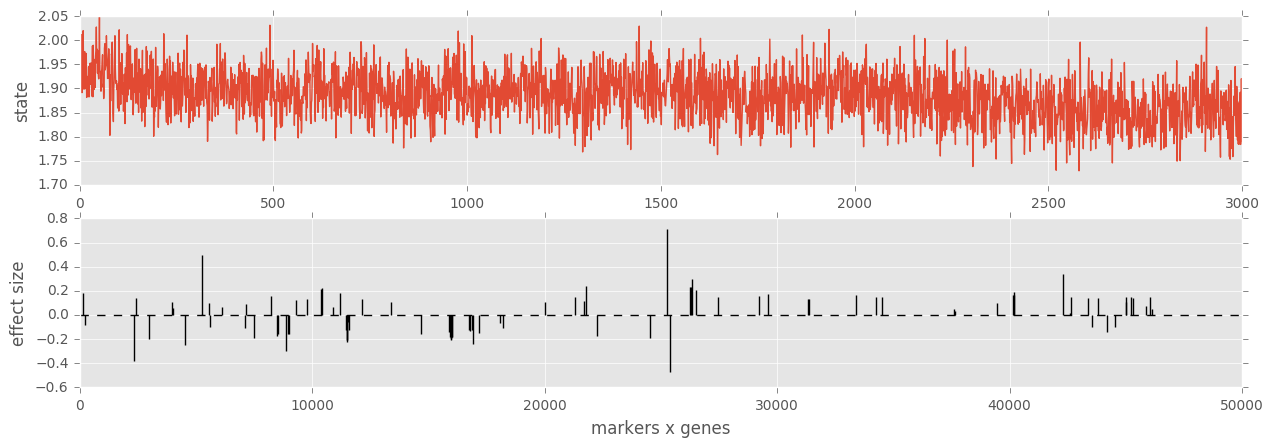

In [56]:
_plt.figure(figsize = (15,10));

_plt.subplot(4,1,1); _plt.plot(res['state'][1000:]); _plt.xlabel('iteration'); _plt.ylabel('state')

_plt.subplot(4,1,2); _plt.vlines(range(res['beta'].size), 0, res['beta'].ravel()); _plt.xlabel('markers x genes'); _plt.ylabel('effect size')
_plt.axhline(linestyle='--', color='k');

In [57]:
_nmp.transpose((_nmp.abs(res['beta']) > 1e-6).nonzero())

array([[   6,   11],
       [  11,   11],
       [  19,    1],
       [ 110,   11],
       [ 115,   11],
       [ 142,   11],
       [ 188,   11],
       [ 190,   11],
       [ 216,   11],
       [ 228,    1],
       [ 232,    1],
       [ 250,    1],
       [ 250,   11],
       [ 264,   11],
       [ 266,   11],
       [ 290,   11],
       [ 339,   11],
       [ 340,   11],
       [ 357,   11],
       [ 391,   11],
       [ 403,   11],
       [ 405,   11],
       [ 423,   11],
       [ 427,   11],
       [ 429,   11],
       [ 443,   11],
       [ 465,   11],
       [ 494,   11],
       [ 495,   11],
       [ 518,   11],
       [ 532,   11],
       [ 544,   11],
       [ 546,   11],
       [ 547,    1],
       [ 547,   11],
       [ 548,   11],
       [ 550,   11],
       [ 551,   11],
       [ 578,   11],
       [ 638,   11],
       [ 699,   11],
       [ 756,   11],
       [ 758,   11],
       [ 759,   11],
       [ 760,   11],
       [ 761,   11],
       [ 762,   11],
       [ 763,

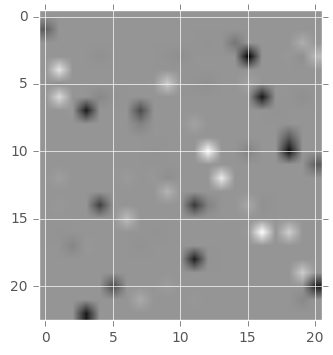

In [77]:
_plt.imshow(res['beta'][::100, :], cmap=_plt.cm.gray)

In [58]:
res_vst = res

In [60]:
import pickle as _pkl

In [61]:
files = {
    'Normal.log': res_log ,
    'Normal.boxcox': res_bcox,
    'Normal.blom': res_blom,
    'Normal.voom': res_voom,
    'Normal.vst': res_vst,
    'Binomial.none': res_bin,
    'NBinomial.none': res_nbin,
    'Poisson.none': res_pois
}

for key in files:
    f = 'TF.common.HIGH.miRNAs.452.{}'.format(key)
    out = files[key]
    with open('results/geuvadis/{}.pkl'.format(f), 'wb') as fh:
        _pkl.dump(out, fh)

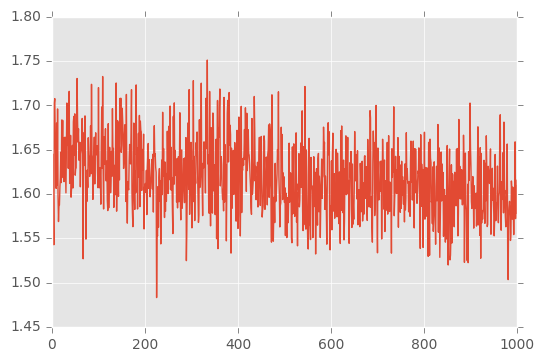

In [19]:
_plt.plot(res['state'][1000:])

In [30]:
with open('results/geuvadis/TF.common.HIGH.miRNAs.452.Normal.voom.pkl', 'rb') as fh:
    res = _pkl.load(fh)

In [96]:
_assoc.get_metrics(Z.T, G, res, model='Normal', scaleG=True, centreZ=True)

{'PCC': 0.11444265574995643,
 'R2': 1.0,
 'RHO': 0.065606738660853925,
 'X2': 34664813.822467275,
 'X2c': -0.56198475304052964,
 'X2p': 1.0099877268677104,
 'nMSE': 1.8918100584501716}

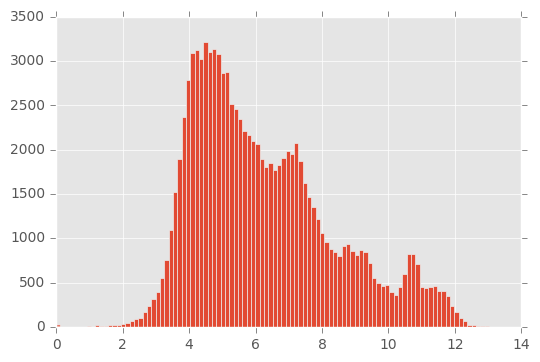

In [97]:
_plt.hist(Z.ravel(), 100);

In [44]:
whos

Variable   Type       Data/Info
-------------------------------
G          ndarray    452x21: 9492 elems, type `int64`, 75936 bytes
Z          ndarray    2226x452: 1006152 elems, type `float64`, 8049216 bytes (7.67633056640625 Mb)
data       dict       n=2
res        dict       n=11
res_bcox   dict       n=11
res_bin    dict       n=13
res_log    dict       n=11
res_nbin   dict       n=15
res_pois   dict       n=13
samples    Index      Index(['HG00096', 'HG0009<...>ype='object', length=452)
